## Part I: Naive Bayes Classifier

## Task 1: Theory (Answers written as comments)
 1. Naive Bayes assumes all features are conditionally independent given the class label.
 2. GaussianNB: for continuous data (normal distribution); MultinomialNB: for count data; BernoulliNB: for binary data.
 3. Naive Bayes handles high-dimensional data well due to its simple probabilistic model and low training time.

## Task 2: Spam Detection using MultinomialNB

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', header=None, names=['label', 'message'])
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X = CountVectorizer().fit_transform(df['message'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9850478468899522
Precision: 0.9307359307359307
Recall: 0.9598214285714286
Confusion Matrix:
 [[1432   16]
 [   9  215]]


## Task 3: GaussianNB with Iris Dataset

In [3]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [4]:
acc_gnb = accuracy_score(y_test, gnb.predict(X_test))
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc_lr = accuracy_score(y_test, lr.predict(X_test))

In [5]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
acc_dt = accuracy_score(y_test, dt.predict(X_test))

In [6]:
print(f"GaussianNB Accuracy: {acc_gnb:.2f}")
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"Decision Tree Accuracy: {acc_dt:.2f}")

GaussianNB Accuracy: 0.98
Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 1.00


# Part II: Decision Trees

# Task 4: Theory written as comments
 1. Entropy measures impurity; Information Gain is the reduction in entropy after a split.
 2. Gini is faster, entropy more informative.
 3. Overfitting happens when the tree is too deep; use pruning, depth limit, or min samples per split.

In [7]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [8]:
df = sns.load_dataset('titanic')
df.dropna(subset=['age', 'embarked', 'sex'], inplace=True)
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])
X = df.drop('survived', axis=1)
y = df['survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6915887850467289
Confusion Matrix:
 [[93 29]
 [37 55]]


In [11]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

[Text(0.45233497191011235, 0.9722222222222222, 'sex <= 0.5\ngini = 0.477\nsamples = 498\nvalue = [302, 196]\nclass = Died'),
 Text(0.22401685393258428, 0.9166666666666666, 'pclass <= 2.5\ngini = 0.372\nsamples = 182\nvalue = [45, 137]\nclass = Survived'),
 Text(0.3381759129213483, 0.9444444444444444, 'True  '),
 Text(0.11235955056179775, 0.8611111111111112, 'age <= 56.5\ngini = 0.088\nsamples = 109\nvalue = [5, 104]\nclass = Survived'),
 Text(0.10112359550561797, 0.8055555555555556, 'fare <= 29.356\ngini = 0.071\nsamples = 108\nvalue = [4, 104]\nclass = Survived'),
 Text(0.0898876404494382, 0.75, 'fare <= 28.231\ngini = 0.15\nsamples = 49\nvalue = [4.0, 45.0]\nclass = Survived'),
 Text(0.07865168539325842, 0.6944444444444444, 'fare <= 22.0\ngini = 0.117\nsamples = 48\nvalue = [3, 45]\nclass = Survived'),
 Text(0.06741573033707865, 0.6388888888888888, 'age <= 27.5\ngini = 0.18\nsamples = 30\nvalue = [3, 27]\nclass = Survived'),
 Text(0.0449438202247191, 0.5833333333333334, 'fare <= 20.2

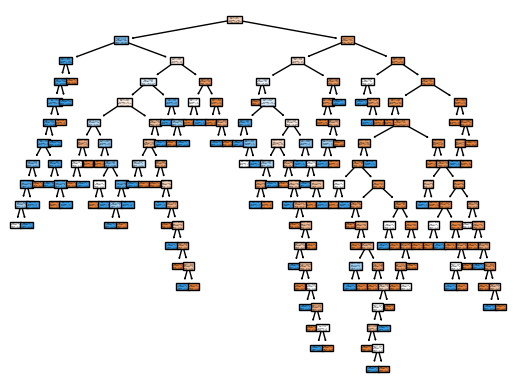

In [12]:
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)

In [13]:
plt.show()

# Task 6: Model Tuning

In [14]:
train_scores = []

In [15]:
test_scores = []
depths = range(1, 20)

In [16]:
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

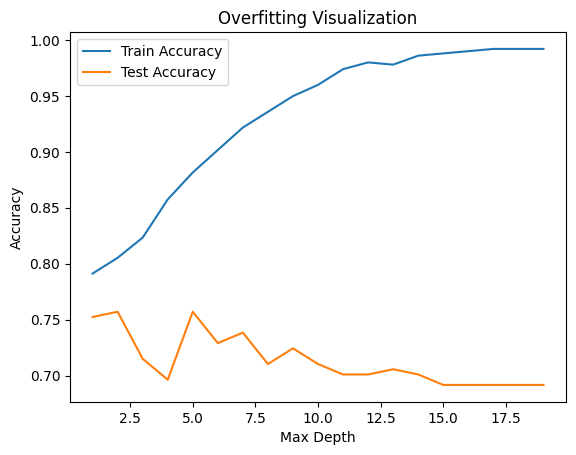

In [17]:
plt.plot(depths, train_scores, label="Train Accuracy")
plt.plot(depths, test_scores, label="Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting Visualization")
plt.show()

## Part III: Ensemble Learning

# Task 7: Theory (written as comments)
 1. Bagging: parallel training; Boosting: sequential training.
 2. Random Forest reduces variance by averaging multiple decision trees.
 3. Boosting can overfit if there's noise, as it focuses on difficult samples.

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [19]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf))
print("Precision:", precision_score(y_test, y_rf))
print("Recall:", recall_score(y_test, y_rf))

Random Forest Accuracy: 0.780373831775701
Precision: 0.7710843373493976
Recall: 0.6956521739130435


In [20]:
importances = pd.Series(rf.feature_importances_, index=X.columns)

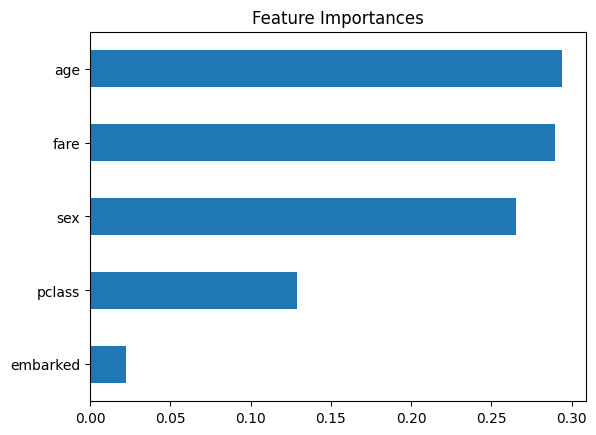

In [21]:
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()

In [22]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import time

In [23]:
start = time.time()
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_ada = ada.predict(X_test)
end = time.time()

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [24]:
from sklearn.metrics import f1_score
print("AdaBoost Accuracy:", accuracy_score(y_test, y_ada))
print("F1 Score:", f1_score(y_test, y_ada))
print("Training Time:", round(end - start, 2), "seconds")

AdaBoost Accuracy: 0.7990654205607477
F1 Score: 0.7624309392265194
Training Time: 0.34 seconds
